In [ ]:
from google.colab import drive 
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Internship/"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import math
import pickle
import datetime

from utilsOT import *
from algos import *

Mounted at /content/drive


# test

In [ ]:
seed = 0
np.random.seed(seed)

n_target = np.random.randint(2,20)
np.random.randint(2,20)

rho_list_target = generate_list_rho(3)
rho_list_source = generate_list_rho(3)

X_target = sample_rho_batch(rho_list_target,n_target)
nu = np.random.rand(n_target)
nu = nu/np.sum(nu) 


In [ ]:
n_iter = 1000000
alpha = 0.1

In [ ]:
v_list = np.zeros([n_target,n_iter])
# W_list = np.zeros([n_iter//1000])

v = np.zeros(n_target)
v_tilde = np.zeros(n_target)

for i in range(1000000) :
    
    v_list[:,i] = v

    # if (i+1)%1000 == 0:
    #     X_sample = sample_rho_batch(rho_list_source, 100000)
    #     mu_sample = np.ones(100000)
    #     mu_sample = mu_sample/np.sum(mu_sample)
    #     W_list[(i+1)//1000 - 1] = W_sd(v,X_sample,X_target,mu_sample,nu,epsilon = 0)

    X_source = sample_rho(rho_list_source)
    step = alpha*(1./np.sqrt(i+1))
    grad = grad_h_0(v_tilde, X_source, X_target,nu)
    v_tilde = v_tilde + step*grad
    v = 1./(i+1)*(v_tilde + i*v)

In [ ]:
flag = True
num = 1000000//1000
W_check = W_list[:num]
# val = np.min([(W_check.max()-W_check.min())*(10**(-3)),10**(-2)])
val = 10**(-3)
for i in range(50):
    if np.all(np.abs(W_check[-1]-W_check[-2-i]) < val) == False: 
        flag = False

print(flag)

False


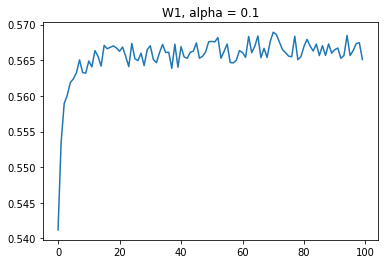

In [ ]:
plt.figure()
plt.plot(W_check)
plt.title('W1, alpha = '+str(alpha))
# plt.ylim([W_check[-1]-10**(-1), W_check[-1]+10**(-1)])
# plt.savefig('permanent/figure/semi-discrete/theo/W1_alpha_'+str(alpha)+'_seed_'+str(seed)+'_iter_'+str(n_iter)+'.png')
plt.show()
plt.close()

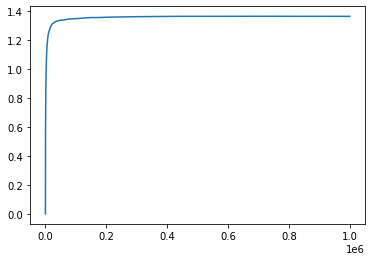

In [ ]:
plt.figure()
a = (v_list**2).sum(axis = 0)
plt.plot(a)
val = 10**(-1)
plt.ylim((a[-1]-val, a[-1]+val))
plt.show()
plt.close()

In [ ]:
W_list = np.zeros(1000)
X_sample = sample_rho_batch(rho_list_source, 100000)
mu_sample = np.ones(100000)
mu_sample = mu_sample/np.sum(mu_sample)
for i in range(1000):
    W_list[i] = W_sd(v_list[:, (99+i*100)],X_sample,X_target,mu_sample,nu,epsilon = 0)

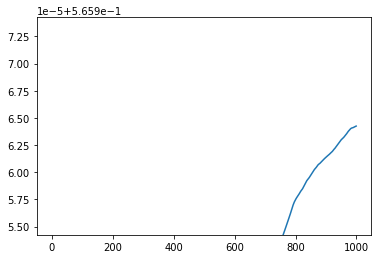

In [ ]:
plt.figure()
plt.plot(W_list)
plt.ylim([W_list[-1]-10**(-5), W_list[-1]+10**(-5)])
plt.show()
plt.close()

In [ ]:
flag = True
# val = np.min([(W_check.max()-W_check.min())*(10**(-3)),10**(-2)])
val = 10**(-4)
for i in range(500):
    if np.all(np.abs(W_list[-1]-W_list[-2-i]) < val) == False: 
        flag = False

print(flag)

True


In [ ]:
W_list = np.zeros(100)
X_sample = sample_rho_batch(rho_list_source, 100000)
mu_sample = np.ones(100000)
mu_sample = mu_sample/np.sum(mu_sample)
for i in range(100):
    W_list[i] = W_sd(v_list[:, (999+i*1000)],X_sample,X_target,mu_sample,nu,epsilon = 0)

In [ ]:
flag = True
# val = np.min([(W_check.max()-W_check.min())*(10**(-3)),10**(-2)])
val = 10**(-5)
for i in range(50):
    if np.all(np.abs(W_list[-1]-W_list[-2-i]) < val) == False: 
        flag = False

print(flag)

False


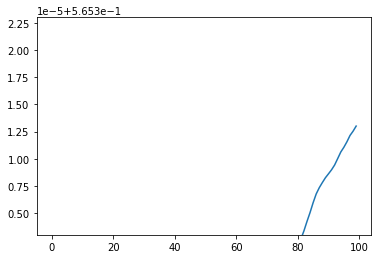

In [ ]:
plt.figure()
plt.plot(W_list)
plt.ylim([W_list[-1]-10**(-5), W_list[-1]+10**(-5)])
plt.show()
plt.close()

In [ ]:
W_list = np.zeros(1000)
X_sample = sample_rho_batch(rho_list_source, 100000)
mu_sample = np.ones(100000)
mu_sample = mu_sample/np.sum(mu_sample)
for i in range(1000):
    W_list[i] = W_sd(v_list[:, (999+i*1000)],X_sample,X_target,mu_sample,nu,epsilon = 0)

In [ ]:
flag = True
# val = np.min([(W_check.max()-W_check.min())*(10**(-3)),10**(-2)])
val = 10**(-8)
for i in range(50):
    if np.all(np.abs(W_list[-1]-W_list[-2-i]) < val) == False: 
        flag = False

print(flag)

False


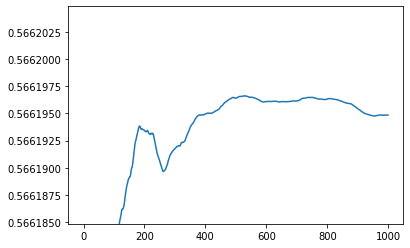

In [ ]:
plt.figure()
plt.plot(W_list)
plt.ylim([W_list[-1]-10**(-5), W_list[-1]+10**(-5)])
plt.show()
plt.close()

In [ ]:
flag = True
a = (v_list**2).sum(axis = 0)
val = 10**(-3)
for i in range(50000):
    if np.all(np.abs(a[-1]-a[-2-i]) < val) == False: 
        flag = False

print(flag)

True


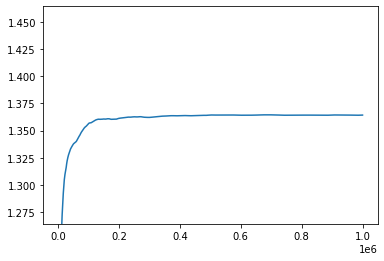

In [ ]:
plt.figure()
a = (v_list**2).sum(axis = 0)
plt.plot(a)
val = 10**(-1)
plt.ylim((a[-1]-val, a[-1]+val))
plt.show()
plt.close()

#...

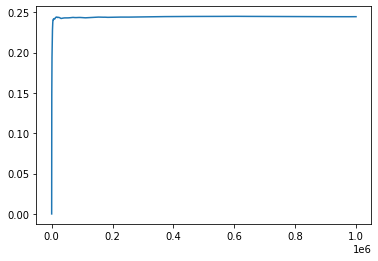

In [ ]:
plt.figure()
plt.plot(v_list[0])
plt.show()
plt.close()

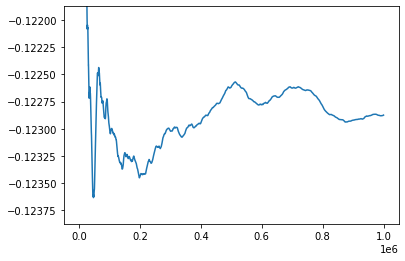

In [ ]:
plt.figure()
axis = 13
plt.plot(v_list[axis])
val = 10**(-3)
plt.ylim((v_list[axis][-1]-val,v_list[axis][-1]+val))
plt.show()
plt.close()

In [ ]:
alpha = 0.01

for i in range(100000) :
    
    v_list[:,i] = v

    if (i+1)%100 == 0:
        X_sample = sample_rho_batch(rho_list_source, 10000)
        mu_sample = np.ones(10000)
        mu_sample = mu_sample/np.sum(mu_sample)
        W_list[(i+1)//100 - 1] = W_sd(v,X_sample,X_target,mu_sample,nu,epsilon = 0)

    X_source = sample_rho(rho_list_source)
    step = alpha*(1./np.sqrt(i+1))
    grad = grad_h_0(v_tilde, X_source, X_target,nu)
    v_tilde = v_tilde + step*grad
    v = 1./(i+1)*(v_tilde + i*v)

In [ ]:
flag = True
num = 100000//100
W_check = W_list[:num]
# val = np.min([(W_check.max()-W_check.min())*(10**(-3)),10**(-2)])
val = 10**(-2)
for i in range(50):
    if np.all(np.abs(W_check[-1]-W_check[-2-i]) < val) == False: 
        flag = False

print(flag)

False


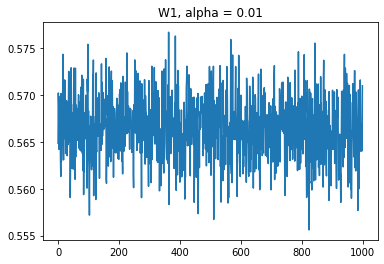

In [ ]:
plt.figure()
plt.plot(W_check)
plt.title('W1, alpha = '+str(alpha))
# plt.ylim([W_check[-1]-10**(-1), W_check[-1]+10**(-1)])
plt.savefig('permanent/figure/semi-discrete/theo/W1_alpha_'+str(alpha)+'_seed_'+str(seed)+'_iter_'+str(n_iter)+'.png')
plt.show()
plt.close()

In [ ]:
alpha = 0.001

for i in range(100000) :
    
    v_list[:,i] = v

    if (i+1)%100 == 0:
        X_sample = sample_rho_batch(rho_list_source, 10000)
        mu_sample = np.ones(10000)
        mu_sample = mu_sample/np.sum(mu_sample)
        W_list[(i+1)//100 - 1] = W_sd(v,X_sample,X_target,mu_sample,nu,epsilon = 0)

    X_source = sample_rho(rho_list_source)
    step = alpha*(1./np.sqrt(i+1))
    grad = grad_h_0(v_tilde, X_source, X_target,nu)
    v_tilde = v_tilde + step*grad
    v = 1./(i+1)*(v_tilde + i*v)

In [ ]:
flag = True
num = 100000//100
W_check = W_list[:num]
# val = np.min([(W_check.max()-W_check.min())*(10**(-3)),10**(-2)])
val = 10**(-2)
for i in range(50):
    if np.all(np.abs(W_check[-1]-W_check[-2-i]) < val) == False: 
        flag = False

print(flag)

True


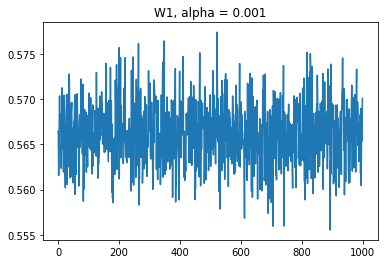

In [ ]:
plt.figure()
plt.plot(W_check)
plt.title('W1, alpha = '+str(alpha))
# plt.ylim([W_check[-1]-10**(-2), W_check[-1]+10**(-2)])
plt.savefig('permanent/figure/semi-discrete/theo/W1_alpha_'+str(alpha)+'_seed_'+str(seed)+'_iter_'+str(n_iter)+'.png')
plt.show()
plt.close()

In [ ]:
alpha = 0.0001

for i in range(100000) :
    
    v_list[:,i] = v

    if (i+1)%100 == 0:
        X_sample = sample_rho_batch(rho_list_source, 10000)
        mu_sample = np.ones(10000)
        mu_sample = mu_sample/np.sum(mu_sample)
        W_list[(i+1)//100 - 1] = W_sd(v,X_sample,X_target,mu_sample,nu,epsilon = 0)

    X_source = sample_rho(rho_list_source)
    step = alpha*(1./np.sqrt(i+1))
    grad = grad_h_0(v_tilde, X_source, X_target,nu)
    v_tilde = v_tilde + step*grad
    v = 1./(i+1)*(v_tilde + i*v)

In [ ]:
flag = True
num = 100000//100
W_check = W_list[:num]
# val = np.min([(W_check.max()-W_check.min())*(10**(-3)),10**(-2)])
val = 10**(-3)
for i in range(50):
    if np.all(np.abs(W_check[-1]-W_check[-2-i]) < val) == False: 
        flag = False

print(flag)

False


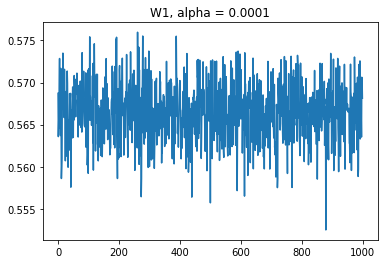

In [ ]:
plt.figure()
plt.plot(W_check)
plt.title('W1, alpha = '+str(alpha))
# plt.ylim([W_check[-1]-10**(-2), W_check[-1]+10**(-2)])
plt.savefig('permanent/figure/semi-discrete/theo/W1_alpha_'+str(alpha)+'_seed_'+str(seed)+'_iter_'+str(n_iter)+'.png')
plt.show()
plt.close()

In [ ]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/f/f9/Beep_example.ogg").play()')

# functions

In [ ]:
def calculate_v_list_ASGD_semi_discrete_non_reg(nu,X_target,rho_list_source, alpha,n_iter):
    n_target = len(X_target)
    v_list = np.zeros([n_target,n_iter])

    v = np.zeros(n_target)
    v_tilde = np.zeros(n_target)
    
    for i in range(n_iter) :
        
        v_list[:,i] = v

        X_source = sample_rho(rho_list_source)
        step = alpha*(1./np.sqrt(i+1))
        grad = grad_h_0(v_tilde, X_source, X_target,nu)
        v_tilde = v_tilde + step*grad
        v = 1./(i+1)*(v_tilde + i*v)
    
    return v_list




In [ ]:
def runALL(seeds, alpha, n_iter):
    for seed in seeds:
        if seed % 10 == 0:
            print('============= from '+str(seed)+' to '+str(seed+10)+' =============')

        np.random.seed(seed)

        n_target = np.random.randint(2,20)
        np.random.randint(2,20)

        rho_list_target = generate_list_rho(3)
        rho_list_source = generate_list_rho(3)

        X_target = sample_rho_batch(rho_list_target,n_target)
        nu = np.random.rand(n_target)
        nu = nu/np.sum(nu) 

        X_sample = sample_rho_batch(rho_list_source, 100000)
        mu_sample = np.ones(100000)
        mu_sample = mu_sample/np.sum(mu_sample)

        t0 = datetime.datetime.now()
        v_list = calculate_v_list_ASGD_semi_discrete_non_reg(nu,X_target,rho_list_source, alpha, n_iter)
        W_final = W_sd(v_list[:,-1],X_sample,X_target,mu_sample,nu,epsilon = 0)
        t1 = datetime.datetime.now()

        flag = True
        test_v = (v_list**2).sum(axis = 0)
        val = 10**(-3)
        for i in range(50000):
            if np.all(np.abs(test_v[-1]-test_v[-2-i]) < val) == False: 
                flag = False
        print('seed: '+str(seed)+', n_iter: '+str(n_iter)+', time: '+str((t1-t0).seconds)+', valid: '+str(flag))

        np.save('permanent/result/semi-discrete/theo/W1_theo_final_seed_'+str(seed)+'.npy',W_final)
        
        plt.figure()
        plt.plot(test_v)
        plt.title('test_v, alpha = '+str(alpha))
        plt.savefig('permanent/figure/semi-discrete/theo/test_v1_seed_'+str(seed)+'.png')
        plt.close()



# eps_init = 0.1

In [ ]:
runALL(range(0,10), alpha = 0.1, n_iter = 1000000)

============= from 0 to 10 =============
seed: 0, n_iter: 1000000, time: 982, valid: True
seed: 1, n_iter: 1000000, time: 983, valid: True
seed: 2, n_iter: 1000000, time: 972, valid: True
seed: 3, n_iter: 1000000, time: 972, valid: True
seed: 4, n_iter: 1000000, time: 967, valid: True
seed: 5, n_iter: 1000000, time: 968, valid: True
seed: 6, n_iter: 1000000, time: 968, valid: True
seed: 7, n_iter: 1000000, time: 966, valid: True
seed: 8, n_iter: 1000000, time: 967, valid: True
seed: 9, n_iter: 1000000, time: 963, valid: True


In [ ]:
runALL(range(10,20), alpha = 0.1, n_iter = 1000000)

============= from 10 to 20 =============
seed: 10, n_iter: 1000000, time: 970, valid: True
seed: 11, n_iter: 1000000, time: 982, valid: False
seed: 12, n_iter: 1000000, time: 957, valid: True
seed: 13, n_iter: 1000000, time: 958, valid: True
seed: 14, n_iter: 1000000, time: 962, valid: True
seed: 15, n_iter: 1000000, time: 959, valid: True
seed: 16, n_iter: 1000000, time: 960, valid: True
seed: 17, n_iter: 1000000, time: 960, valid: True
seed: 18, n_iter: 1000000, time: 960, valid: True
seed: 19, n_iter: 1000000, time: 960, valid: True


In [ ]:
runALL(range(11,12), alpha = 0.1, n_iter = 2000000)

seed: 11, n_iter: 2000000, time: 1442, valid: True


In [ ]:
runALL(range(20,30), alpha = 0.1, n_iter = 1000000)

============= from 20 to 30 =============
seed: 20, n_iter: 1000000, time: 957, valid: True
seed: 21, n_iter: 1000000, time: 959, valid: True
seed: 22, n_iter: 1000000, time: 959, valid: True
seed: 23, n_iter: 1000000, time: 957, valid: True
seed: 24, n_iter: 1000000, time: 960, valid: True
seed: 25, n_iter: 1000000, time: 960, valid: True
seed: 26, n_iter: 1000000, time: 960, valid: True
seed: 27, n_iter: 1000000, time: 962, valid: True
seed: 28, n_iter: 1000000, time: 964, valid: True
seed: 29, n_iter: 1000000, time: 967, valid: True


In [ ]:
runALL(range(30,40), alpha = 0.1, n_iter = 1000000)

============= from 30 to 40 =============
seed: 30, n_iter: 1000000, time: 1023, valid: True
seed: 31, n_iter: 1000000, time: 1009, valid: True
seed: 32, n_iter: 1000000, time: 1005, valid: True
seed: 33, n_iter: 1000000, time: 1008, valid: True
seed: 34, n_iter: 1000000, time: 983, valid: True
seed: 35, n_iter: 1000000, time: 962, valid: True
seed: 36, n_iter: 1000000, time: 960, valid: True
seed: 37, n_iter: 1000000, time: 963, valid: False
seed: 38, n_iter: 1000000, time: 966, valid: True
seed: 39, n_iter: 1000000, time: 964, valid: True


In [ ]:
runALL(range(37,38), alpha = 0.1, n_iter = 2000000)

seed: 37, n_iter: 2000000, time: 1522, valid: True


In [ ]:
runALL(range(40,50), alpha = 0.1, n_iter = 1000000)

============= from 40 to 50 =============
seed: 40, n_iter: 1000000, time: 1003, valid: True
seed: 41, n_iter: 1000000, time: 999, valid: True
seed: 42, n_iter: 1000000, time: 1005, valid: True
seed: 43, n_iter: 1000000, time: 1018, valid: True
seed: 44, n_iter: 1000000, time: 1017, valid: True
seed: 45, n_iter: 1000000, time: 1024, valid: True
seed: 46, n_iter: 1000000, time: 1016, valid: True
seed: 47, n_iter: 1000000, time: 1016, valid: False
seed: 48, n_iter: 1000000, time: 1012, valid: True
seed: 49, n_iter: 1000000, time: 1021, valid: True


In [ ]:
runALL(range(47,48), alpha = 0.1, n_iter = 2000000)

seed: 47, n_iter: 2000000, time: 1416, valid: True


In [ ]:
runALL(range(50,60), alpha = 0.1, n_iter = 1000000)

============= from 50 to 60 =============
seed: 50, n_iter: 1000000, time: 1026, valid: True
seed: 51, n_iter: 1000000, time: 1008, valid: True
seed: 52, n_iter: 1000000, time: 975, valid: True
seed: 53, n_iter: 1000000, time: 983, valid: True
seed: 54, n_iter: 1000000, time: 970, valid: True
seed: 55, n_iter: 1000000, time: 967, valid: False
seed: 56, n_iter: 1000000, time: 962, valid: True
seed: 57, n_iter: 1000000, time: 968, valid: True
seed: 58, n_iter: 1000000, time: 971, valid: True
seed: 59, n_iter: 1000000, time: 971, valid: True


In [ ]:
runALL(range(55,56), alpha = 0.1, n_iter = 2000000)

seed: 55, n_iter: 2000000, time: 1418, valid: True


In [ ]:
runALL(range(60,70), alpha = 0.1, n_iter = 1000000)

============= from 60 to 70 =============
seed: 60, n_iter: 1000000, time: 1024, valid: False
seed: 61, n_iter: 1000000, time: 1014, valid: True
seed: 62, n_iter: 1000000, time: 1014, valid: True
seed: 63, n_iter: 1000000, time: 1021, valid: True
seed: 64, n_iter: 1000000, time: 1021, valid: True
seed: 65, n_iter: 1000000, time: 1021, valid: True
seed: 66, n_iter: 1000000, time: 1022, valid: True
seed: 67, n_iter: 1000000, time: 1021, valid: True
seed: 68, n_iter: 1000000, time: 1019, valid: True
seed: 69, n_iter: 1000000, time: 1030, valid: True


In [ ]:
runALL(range(60,61), alpha = 0.1, n_iter = 2000000)

============= from 60 to 70 =============
seed: 60, n_iter: 2000000, time: 1447, valid: True


In [ ]:
runALL(range(70,80), alpha = 0.1, n_iter = 1000000)

============= from 70 to 80 =============
seed: 70, n_iter: 1000000, time: 1028, valid: True
seed: 71, n_iter: 1000000, time: 1030, valid: True
seed: 72, n_iter: 1000000, time: 1028, valid: True
seed: 73, n_iter: 1000000, time: 1033, valid: True
seed: 74, n_iter: 1000000, time: 1038, valid: True
seed: 75, n_iter: 1000000, time: 1038, valid: True
seed: 76, n_iter: 1000000, time: 1040, valid: True
seed: 77, n_iter: 1000000, time: 1050, valid: True
seed: 78, n_iter: 1000000, time: 1052, valid: True
seed: 79, n_iter: 1000000, time: 1032, valid: True


In [ ]:
runALL(range(80,90), alpha = 0.1, n_iter = 1000000)

============= from 80 to 90 =============
seed: 80, n_iter: 1000000, time: 1025, valid: True
seed: 81, n_iter: 1000000, time: 1029, valid: True
seed: 82, n_iter: 1000000, time: 1003, valid: True
seed: 83, n_iter: 1000000, time: 988, valid: True
seed: 84, n_iter: 1000000, time: 986, valid: True
seed: 85, n_iter: 1000000, time: 987, valid: True
seed: 86, n_iter: 1000000, time: 993, valid: True
seed: 87, n_iter: 1000000, time: 996, valid: True
seed: 88, n_iter: 1000000, time: 988, valid: True
seed: 89, n_iter: 1000000, time: 990, valid: True


In [ ]:
runALL(range(90,91), alpha = 0.1, n_iter = 1000000)

============= from 90 to 100 =============
seed: 90, n_iter: 1000000, time: 988, valid: True


In [ ]:
runALL(range(91,100), alpha = 0.1, n_iter = 1000000)

seed: 91, n_iter: 1000000, time: 708, valid: True
seed: 92, n_iter: 1000000, time: 711, valid: True
seed: 93, n_iter: 1000000, time: 713, valid: True
seed: 94, n_iter: 1000000, time: 717, valid: True
seed: 95, n_iter: 1000000, time: 714, valid: True
seed: 96, n_iter: 1000000, time: 717, valid: True
seed: 97, n_iter: 1000000, time: 717, valid: True
seed: 98, n_iter: 1000000, time: 724, valid: True
seed: 99, n_iter: 1000000, time: 723, valid: True
